<a href="https://colab.research.google.com/github/Ar-Anik/Machine_Learning/blob/main/Logistic_Regression(Multiclass_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

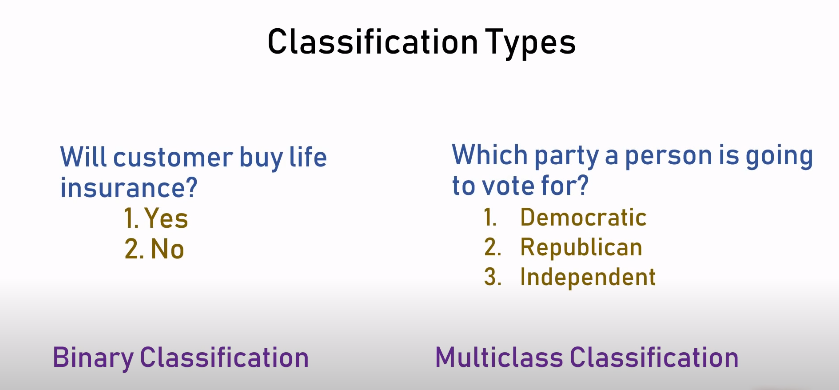

[sklearn.datasets.load_digits()](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

[sklearn.datasets.load_digits()](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

[sklearn.datasets.load_digits()](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

[sklearn.datasets.load_digits()](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

In [4]:
digits = load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [8]:
# First digit picture is represent by this 1D array

digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

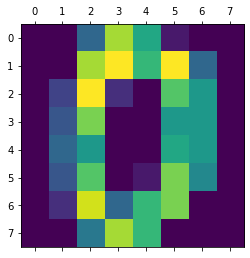

In [10]:
# First digit Picture

plt.matshow(digits.images[0])

plt.show()

<Figure size 432x288 with 0 Axes>

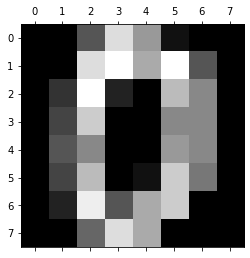

In [14]:
plt.gray()

plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

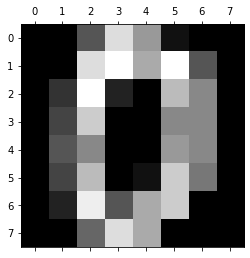

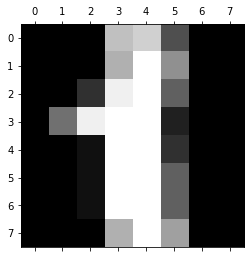

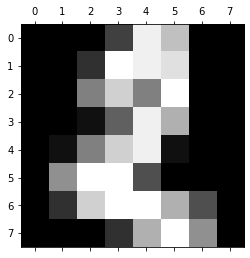

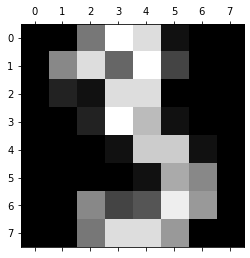

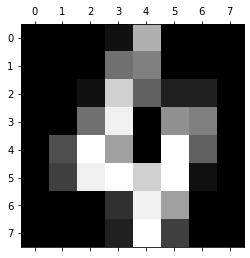

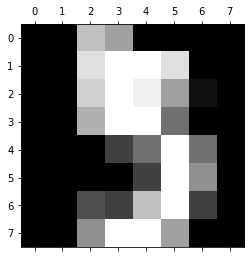

In [16]:
plt.gray()

for i in range(6):
  plt.matshow(digits.images[i])

In [18]:
# target show the sequence

digits.target[0:5]

array([0, 1, 2, 3, 4])

In [19]:
digits.target[5]

5

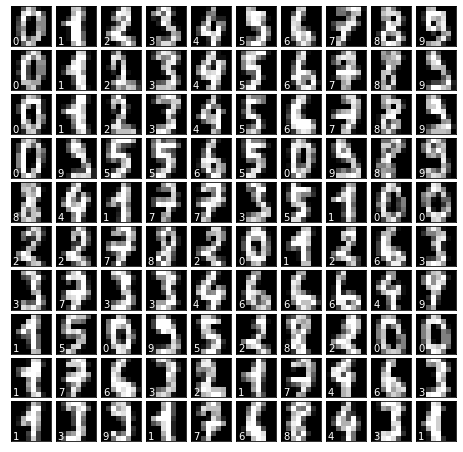

In [65]:
# The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. 
# Let's visualize the first hundred of these
# ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')

fig, axes = plt.subplots(10, 10, figsize=(8, 8), gridspec_kw=dict(hspace=0.1, wspace=0.1), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i])
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='white')

In [20]:
# train Logistic Regression Model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [21]:
# length of train data

len(x_train)

1437

In [22]:
# length of test data

len(x_test)

360

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=2000)

In [27]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# Model currectness

model.score(x_test, y_test)

0.9722222222222222

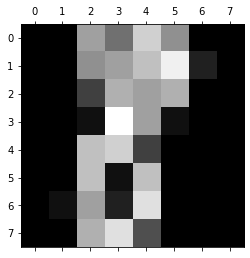

In [76]:
# each value of digits.images show above

plt.matshow(digits.images[18])

In [75]:
digits.target[18]

8

In [77]:
model.predict(digits.data[[18]])

array([8])

In [78]:
# this value images are show above

model.predict(digits.data[0:100])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 5, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 8, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [80]:
# confusion matrix

y_predict = model.predict(x_test)

from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_predict)

cmatrix

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 30,  1],
       [ 1,  0,  0,  1,  0,  1,  0,  0,  1, 38]])

Text(66.5, 0.5, 'Truth')

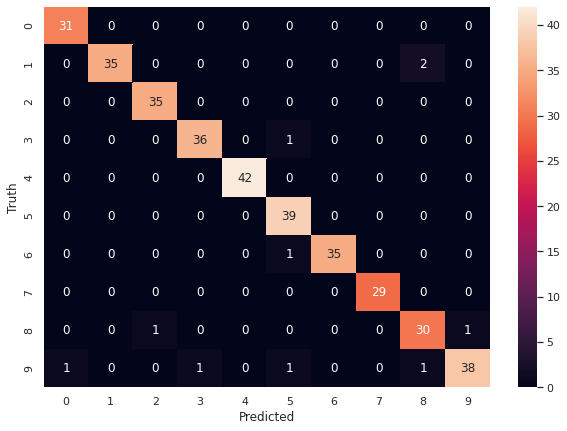

In [88]:
import seaborn

plt.figure(figsize=(10, 7))

seaborn.heatmap(cmatrix, annot=True)
seaborn.set()

plt.xlabel('Predicted')
plt.ylabel('Truth') 